In [2]:
pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 12.1 MB/s eta 0:00:00


In [8]:
pip install textstat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.3/105.3 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 939.4/939.4 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 68.7 MB/s eta 0:00:00


In [43]:
from datasets import load_dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud
import textstat
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import nltk
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [4]:
news_dataset = load_dataset("abisee/cnn_dailymail", "3.0.0")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/15.6k [00:00<?, ?B/s]

train-00000-of-00003.parquet:   0%|          | 0.00/257M [00:00<?, ?B/s]

train-00001-of-00003.parquet:   0%|          | 0.00/257M [00:00<?, ?B/s]

train-00002-of-00003.parquet:   0%|          | 0.00/259M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/34.7M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/30.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/287113 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/13368 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/11490 [00:00<?, ? examples/s]

In [10]:
def retrieve_dataset(news_dataset,rows=2000):
    article=[]
    highlights=[]

    for articles in range(rows):
        article.append(news_dataset["train"][articles]["article"])
        highlights.append(news_dataset["train"][articles]["highlights"])

    extracted_info = pd.DataFrame({
    'article': article,
    'highlights': highlights})

    return extracted_info


In [11]:
news_dataframe=retrieve_dataset(news_dataset)

In [19]:
news_dataframe

,article,highlights
0,"LONDON, England (Reuters) -- Harry Potter star...",Harry Potter star Daniel Radcliffe gets £20M f...
1,Editor's note: In our Behind the Scenes series...,Mentally ill inmates in Miami are housed on th...
2,"MINNEAPOLIS, Minnesota (CNN) -- Drivers who we...","NEW: ""I thought I was going to die,"" driver sa..."
3,WASHINGTON (CNN) -- Doctors removed five small...,"Five small polyps found during procedure; ""non..."
4,(CNN) -- The National Football League has ind...,"NEW: NFL chief, Atlanta Falcons owner critical..."
...,...,...
1995,(CNN) -- Juventus came from behind to defeat B...,Juventus recover from going a goal behind to d...
1996,"(CNN) -- Josef Fritzl, the Austrian accused o...",Man accused of keeping daughter in a cellar fo...
1997,(Coastal Living) -- Whether scaling a mountain...,Canaveral National Seashore in Florida offers ...
1998,(CNN) -- Commentators who have watched the con...,Some commentators have called the peace proces...


In [17]:
news_dataframe.to_csv("news_dataframe.csv", index=False)

In [24]:


# Load dataset (assuming a CSV format for now, update the path accordingly)
file_path = "news_dataframe.csv"  # Replace with actual file path if different
df = pd.read_csv(file_path)

# Drop any completely empty rows
df.dropna(inplace=True)

# Display basic dataset info
dataset_info = {
    "Total Samples": len(df),
    "Missing Values": df.isnull().sum().to_dict(),
    "Duplicates": df.duplicated().sum(),
}

# Word and sentence counts
df["article_word_count"] = df["article"].apply(lambda x: len(word_tokenize(str(x))))
df["highlight_word_count"] = df["highlights"].apply(lambda x: len(word_tokenize(str(x))))
df["article_sentence_count"] = df["article"].apply(lambda x: len(sent_tokenize(str(x))))
df["highlight_sentence_count"] = df["highlights"].apply(lambda x: len(sent_tokenize(str(x))))



In [62]:
dataset_info

{'Total Samples': 2000,
 'Missing Values': {'article': 0, 'highlights': 0},
 'Duplicates': 110}

In [26]:
# Readability Scores
df["flesch_reading_ease"] = df["article"].apply(lambda x: textstat.flesch_reading_ease(str(x)))
df["gunning_fog_index"] = df["article"].apply(lambda x: textstat.gunning_fog(str(x)))


In [27]:

# Lexical Diversity
df["lexical_diversity"] = df["article"].apply(lambda x: len(set(word_tokenize(str(x)))) / len(word_tokenize(str(x))) if len(word_tokenize(str(x))) > 0 else 0)


In [30]:

# Load NLP Model for Named Entity Recognition
nlp = spacy.load("en_core_web_sm")

def extract_named_entities(text):
    doc = nlp(text)
    return [ent.text for ent in doc.ents]

df["named_entities"] = df["article"].apply(lambda x: extract_named_entities(str(x)))

In [32]:
# TF-IDF Keyword Extraction
vectorizer = TfidfVectorizer(stop_words='english', max_features=20)
tfidf_matrix = vectorizer.fit_transform(df["article"])
feature_names = vectorizer.get_feature_names_out()
keywords = [feature_names[i] for i in np.argsort(tfidf_matrix.toarray().sum(axis=0))[-10:]]

In [33]:
# Cosine Similarity between Articles and Highlights
vectorizer_sim = TfidfVectorizer(stop_words="english")
article_vectors = vectorizer_sim.fit_transform(df["article"])
highlight_vectors = vectorizer_sim.transform(df["highlights"])
cosine_similarities = cosine_similarity(article_vectors, highlight_vectors).diagonal()
df["article_highlight_similarity"] = cosine_similarities

In [55]:
df.to_csv("dataset_EDA.csv",index=False)

In [56]:
df

,article,highlights,article_word_count,highlight_word_count,article_sentence_count,highlight_sentence_count,flesch_reading_ease,gunning_fog_index,lexical_diversity,named_entities,article_highlight_similarity
0,"LONDON, England (Reuters) -- Harry Potter star...",Harry Potter star Daniel Radcliffe gets £20M f...,546,42,24,3,70.84,9.76,0.525641,"[LONDON, England, Reuters, Harry Potter, Danie...",0.605838
1,Editor's note: In our Behind the Scenes series...,Mentally ill inmates in Miami are housed on th...,819,58,45,1,64.00,9.53,0.444444,"[Editor, CNN, Soledad O'Brien, Miami, MIAMI, F...",0.643020
2,"MINNEAPOLIS, Minnesota (CNN) -- Drivers who we...","NEW: ""I thought I was going to die,"" driver sa...",880,52,49,3,73.58,7.75,0.372727,"[MINNEAPOLIS, Minnesota, CNN, Minneapolis, Mis...",0.333081
3,WASHINGTON (CNN) -- Doctors removed five small...,"Five small polyps found during procedure; ""non...",486,31,24,3,55.54,10.50,0.489712,"[WASHINGTON, CNN, five, Bush, Saturday, White ...",0.409806
4,(CNN) -- The National Football League has ind...,"NEW: NFL chief, Atlanta Falcons owner critical...",1134,48,46,4,51.07,11.78,0.372134,"[CNN, The National Football League, Atlanta Fa...",0.558741
...,...,...,...,...,...,...,...,...,...,...,...
1995,(CNN) -- Juventus came from behind to defeat B...,Juventus recover from going a goal behind to d...,346,46,12,3,44.27,15.33,0.572254,"[CNN, Juventus, Bologna 4-1, Saturday, Inter M...",0.331551
1996,"(CNN) -- Josef Fritzl, the Austrian accused o...",Man accused of keeping daughter in a cellar fo...,854,63,41,4,62.07,9.76,0.375878,"[CNN, Josef Fritzl, Austrian, decades, seven, ...",0.558144
1997,(Coastal Living) -- Whether scaling a mountain...,Canaveral National Seashore in Florida offers ...,874,39,60,3,59.09,8.22,0.479405,"[Coastal Living, Mississippi, Gulf Islands Nat...",0.331715
1998,(CNN) -- Commentators who have watched the con...,Some commentators have called the peace proces...,1857,40,74,2,42.51,12.21,0.390953,"[CNN, Northern Ireland, decades, years, Northe...",0.471771


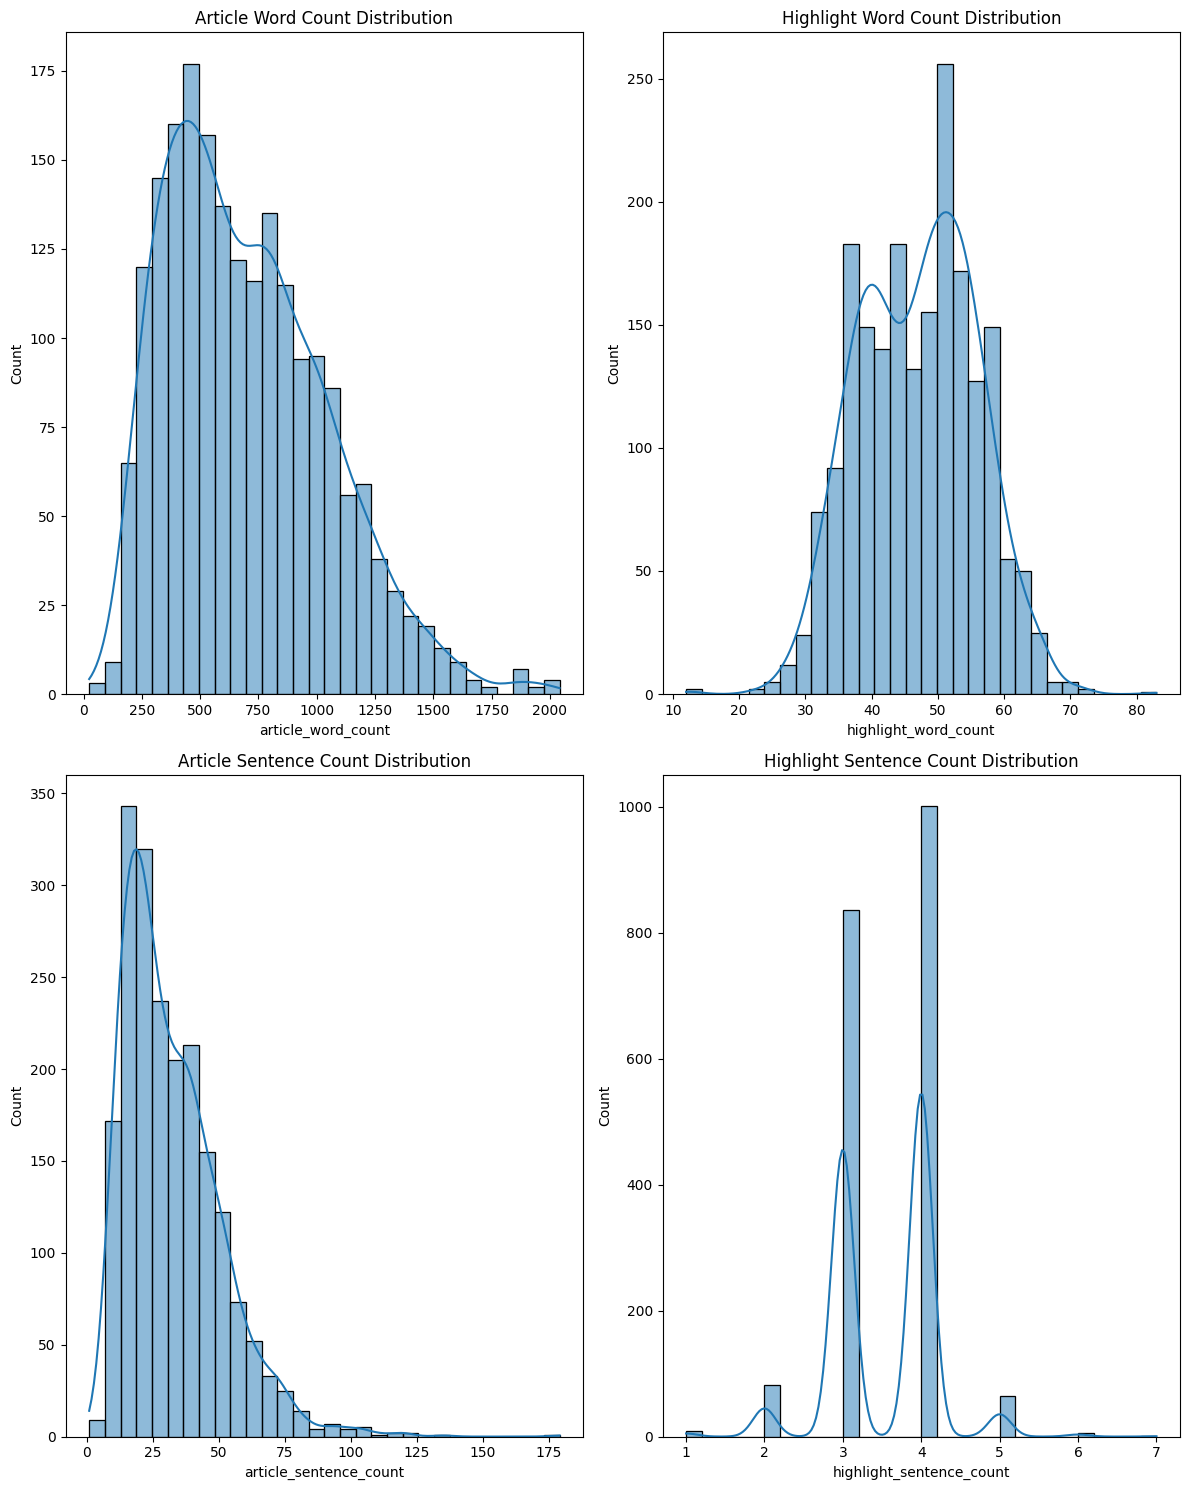

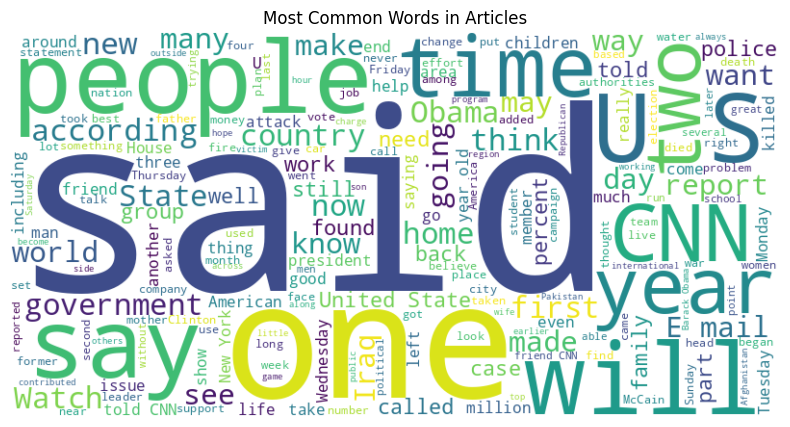

In [53]:
# Generate Visualizations
fig, axes = plt.subplots(2, 2, figsize=(12, 15))

# Word Count Distribution
sns.histplot(df["article_word_count"], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Article Word Count Distribution")

sns.histplot(df["highlight_word_count"], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title("Highlight Word Count Distribution")

# Sentence Count Distribution
sns.histplot(df["article_sentence_count"], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title("Article Sentence Count Distribution")

sns.histplot(df["highlight_sentence_count"], bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title("Highlight Sentence Count Distribution")


plt.tight_layout()
plt.show()

# Word Cloud for Most Common Words in Articles
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(df["article"].astype(str)))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Articles")
plt.show()


### Gunning Fog Index

8 → Standard English (easily understood)

12 → College level

17+ → Very difficult text

### Flesch Reading Ease

90-100 → Very Easy (5th grade level)

60-70 → Standard (8th-9th grade)

0-30 → Very Difficult (University level)

### Lexical Diversity

Close to 1 → More diverse vocabulary

Lower values → More repetition in word usage

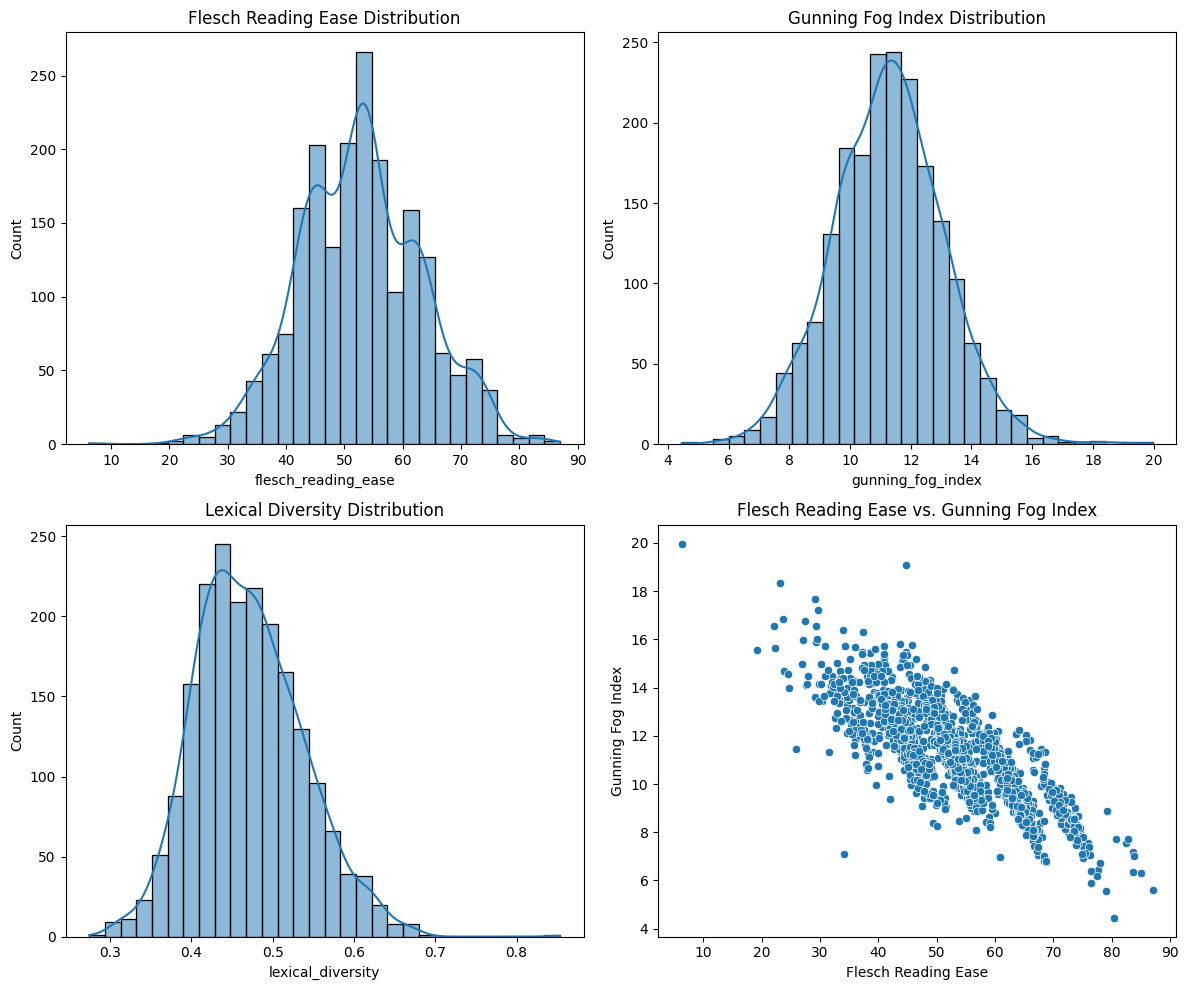

In [48]:

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Histogram for Flesch Reading Ease
sns.histplot(df["flesch_reading_ease"], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Flesch Reading Ease Distribution")

# Histogram for Gunning Fog Index
sns.histplot(df["gunning_fog_index"], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title("Gunning Fog Index Distribution")

# Histogram for Lexical Diversity
sns.histplot(df["lexical_diversity"], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title("Lexical Diversity Distribution")

# Scatter Plot: Flesch Reading Ease vs. Gunning Fog Index
sns.scatterplot(x=df["flesch_reading_ease"], y=df["gunning_fog_index"], ax=axes[1, 1])
axes[1, 1].set_title("Flesch Reading Ease vs. Gunning Fog Index")
axes[1, 1].set_xlabel("Flesch Reading Ease")
axes[1, 1].set_ylabel("Gunning Fog Index")

plt.tight_layout()
plt.show()

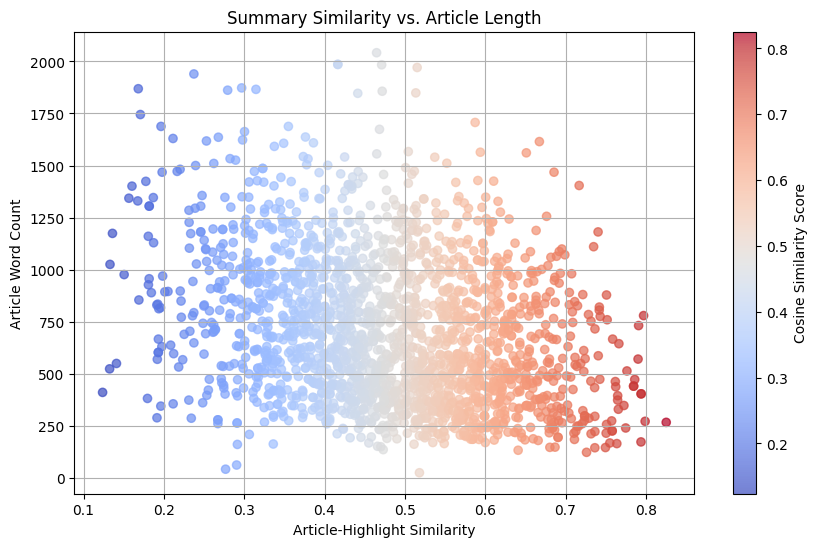

In [51]:
# Scatter plot with swapped axes
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df["article_highlight_similarity"], df["article_word_count"],
                      c=df["article_highlight_similarity"], cmap="coolwarm", alpha=0.7)
plt.colorbar(scatter, label="Cosine Similarity Score")
plt.xlabel("Article-Highlight Similarity")
plt.ylabel("Article Word Count")
plt.title("Summary Similarity vs. Article Length")
plt.grid(True)
plt.show()


In [58]:

# Function to compute Named Entity Overlap Percentage
def compute_entity_overlap(article_entities, summary_entities):
    article_set = set(article_entities)
    summary_set = set(summary_entities)
    if len(article_set) == 0:
        return 0  # Avoid division by zero
    return len(article_set & summary_set) / len(article_set) * 100

# Extract Named Entities from Articles and Highlights
df["article_named_entities"] = df["article"].apply(lambda x: extract_named_entities(str(x)))
df["highlight_named_entities"] = df["highlights"].apply(lambda x: extract_named_entities(str(x)))

# Compute Named Entity Overlap Percentage
df["named_entity_overlap"] = df.apply(lambda row: compute_entity_overlap(row["article_named_entities"], row["highlight_named_entities"]), axis=1)


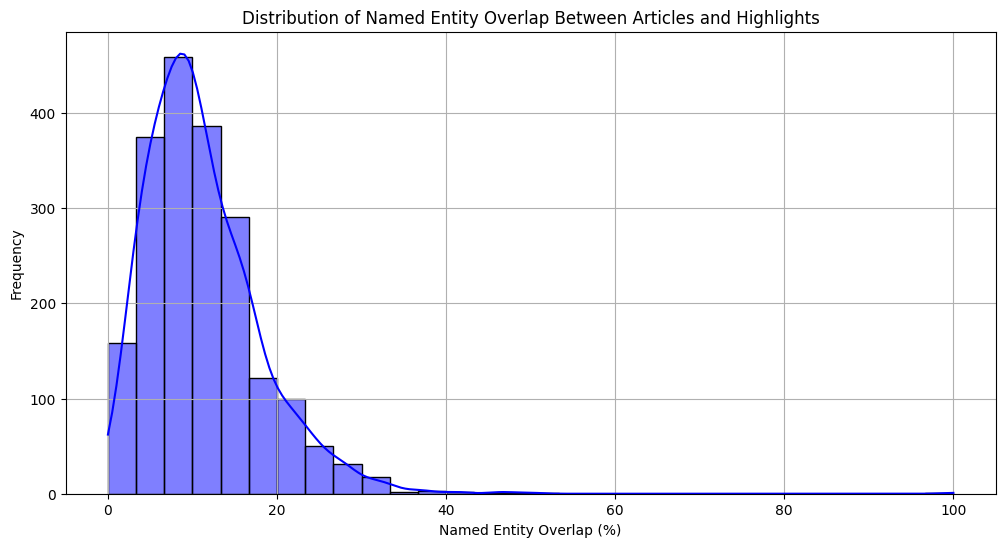

In [59]:

# Visualizing the Overlap Distribution
plt.figure(figsize=(12, 6))
sns.histplot(df["named_entity_overlap"], bins=30, kde=True, color="blue")
plt.xlabel("Named Entity Overlap (%)")
plt.ylabel("Frequency")
plt.title("Distribution of Named Entity Overlap Between Articles and Highlights")
plt.grid(True)
plt.show()
